<a href="https://colab.research.google.com/github/nyp-sit/sdaai-iti103/blob/master/session-4/4_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

We have worked with regression type of problem in the previous exercise. Let us now look at classification type of problem.  We will start with a simpler binary classification problem (i.e. we are only dealing with prediction two classes, e.g. 0 or 1, False or True, Negative or Positive, etc)



## Dataset

We will use a relatively small dataset from UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Based on the features extracted, each sample is classified as  malignant (labelled as 0) or benign (labelled as 1).

In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [61]:
# print the text label of the target
print(cancer.target_names)

# print out the unique values of the target
print(np.unique(cancer.target))

['malignant' 'benign']
[0 1]


**Question 1**

Based on the output of the above cell, what does a target label of 0 and 1 corresponds to? 

Let's create our X (features) and y (label) based on the dictionary keys above.

In [87]:
X, y = cancer["data"], cancer["target"]

print(X.shape)
print(y.shape)

(569, 30)
(569,)


We can see from the shape of X, that there are 30 different features used to classify the sample. 

Let's see how many are labelled as malignant and as benign.

In [88]:
num_malignant = np.sum(y==0)
num_benign = np.sum(y==1)
print('malignant = {}'.format(num_malignant))
print('benign = {}'.format(num_benign))

malignant = 212
benign = 357


Split the data into training set and test set (with 80:20 ratio) and shuffle the data set 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)


# Binary classifier

**Question 2**

Create a binary classifier capable of distinguishing between malignant and benign breast mass sample.  

* Use Logistic Regression and train it on the whole training set.  
* Use the trained classifier to predict the test set 
* Calculate the accuracy score 


In [127]:
# import the logistic regressor 

from sklearn.linear_model import LogisticRegression

# complete the code here 

lr_clf = LogisticRegression(solver='liblinear', random_state=42)

# train on the X_train 
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [116]:
# Make prediction on test set 

# Complete the code here
y_pred = lr_clf.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.956140350877193


Our accuracy on the chosen test set seems quite decent. But how do we know if it is because we are lucky to pick a 'easy' test set. Since our test set is pretty small, it may not be an accurate reflection of the accuracy of our model. A better way is to use cross-validation.

## Measuring Accuracy using Cross-Validation


**Question 3**

Evaluate the model using cross-validation on the **train** data set with the `cross_val_score()` function, with 3 folds. What do you observe? 

In [118]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.95394737, 0.96052632, 0.93377483])

## Confusion Matrix

**Question 4**

A much better way to understand how a trained classifier perform is to look at the confusion matrix.  


*   Generate a set of predictions using `cross_val_predict()` on the train data set
*   Compute the confusion matrix using the `confusion_matrix()` function 



In [119]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lr_clf, X_train, y_train, cv=3)

In [120]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[156,  13],
       [ 10, 276]])

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have non zero values only on its main diagonal.

In [121]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train, y_train_perfect_predictions)

array([[169,   0],
       [  0, 286]])

**Question 5**

How do we know which row of the confusion matrix corresponds to which label? 

*Hint*: use the the `classes_` attribute of the classifier.

In [122]:
lr_clf.classes_

array([0, 1])

## Precision and Recall

**Question 6**

From the confusion matrix above, compute the precision, recall and F1 score manually using the following formula:

- `recall = TP/(TP+FN)`
- `precision = TP/(TP+FP)`
- `F1 = 2*precision*recall/(precision + recall)`

Since we are doing breast cancer detection, a positive test result is considered as maglinant, while a negative is considered as benign.

In [123]:
recall = 157/(157+11)
print(recall)

precision = 157/(157+10)
print(precision)

f1 = 2*precision*recall/(precision+recall)
print(f1)

0.9345238095238095
0.9401197604790419
0.9373134328358208


**Question 7**

Now use the scikit learn's metric function to compute recall, precision and f1_score and compare the values with those manually computed: 
- recall_score()
- precision_score()
- f1_score()

Are they the same? If your calculation is different from those computed by the scikit-learn, why? 


In [124]:
from sklearn.metrics import recall_score, precision_score, f1_score

print(recall_score(y_train, y_train_pred))
print(precision_score(y_train, y_train_pred))
print(f1_score(y_train, y_train_pred))

0.965034965034965
0.9550173010380623
0.96


The is a another useful function called `classification_report()` in scikit-learn that gives all the metrics in one glance

In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       169
           1       0.96      0.97      0.96       286

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455



Note that we have different precison and recall scores for each class (0 and 1). 

**Question 8**

Also note that we have slightly different averages for precision, recall and f1 : macro average and weighted average in the classication_report. What is the difference between the two ? You can refer to this [link](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) for info.  Manually calculate the macro and weighted average to check your understanding. 


In [126]:
(0.90*169+0.96*285)/455

0.9356043956043955

## Precision and recall tradeoff

The confusion matrix and the classification report provide a very detailed analysis of
a particular set of predictions. However, the predictions themselves already threw
away a lot of information that is contained in the model. 

Most classifiers provide a decision_function or a predict_proba method to
assess degrees of certainty about predictions. Making predictions can be seen as
thresholding the output of decision_function or predict_proba at a certain fixed
point—in binary classification we use 0 for the decision function and 0.5 for
predict_proba.

In logistic regression, we can use the `decision_function()` method to compute the scores.   

In [147]:
sample_X = X[20]
sample_y = y[20]

y_score = lr_clf.decision_function([sample_X])
print(y_score)

[5.3160885]


With threshold = 0, the prediction (of positive case, i.e. 1) is correct.

In [148]:
threshold = 0
y_some_X_pred = (y_score > threshold)
print(y_some_X_pred == sample_y)

[ True]


With threshold set at 6, prediction (of positive case, i.e. 1) is wrong. In other words, we failed to detect positive cases (lower recall)

In [151]:
threshold = 6
y_some_data_pred = (y_score > threshold)
print(y_some_data_pred == sample_y)

[False]


With a higher threshold, it decreases the recall and increases the precision. Conversely, with a lower threshold, we increases recall at the expense of decrease in precision. To decide which threshold to use, get the scores of all instances in the training set using the `cross_val_predict()` function to return decision scores instead of predictions.

Perform cross validation to get the scores for all instances.

In [152]:
y_scores = cross_val_predict(lr_clf, X_train, y_train, cv=3,
                             method="decision_function")

Compute precision and recall for all possible thresholds using the precision_recall_curve function.

In [153]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

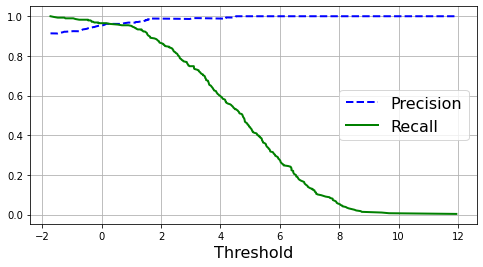

In [169]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                                           

plt.figure(figsize=(8, 4))                      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

If we set our threshold and use it to make predictions, we will get the same prediction results as the `cross_val_predict()` function

In [170]:
(y_train_pred == (y_scores > 0)).all()

True

Another way to select a good precision/recall trade-off is to plot precision directly against recall.

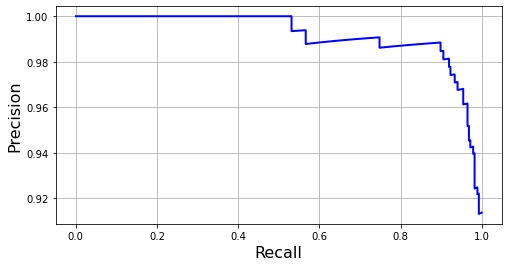

In [171]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    #plt.axis([-5, 10, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 4))
plot_precision_vs_recall(precisions, recalls)

plt.show()

We want to aim for 98% or better precision, compute the threshold value.

In [172]:
threshold_98_precision = thresholds[np.argmax(precisions >= 0.98)]
threshold_98_precision

1.4891353817130129

In [173]:
y_train_pred_98 = (y_scores >= threshold_98_precision)

Compute the precision and recall score

In [174]:
precision_score(y_train, y_train_pred_98)

0.9813432835820896

In [175]:
recall_score(y_train, y_train_pred_98)

0.9195804195804196

# ROC Curves

The receiver operation characteristic (ROC) curve is another common tool used with binary classifiers.  It is similar to the precision/recall curve, but it plots the true positive rate (recall) against the false positive rate.  

**Question 9**

Compute the True positive rate (TPR), False positive rate (FPR) for various thresholds using the roc_curve() function.

In [176]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

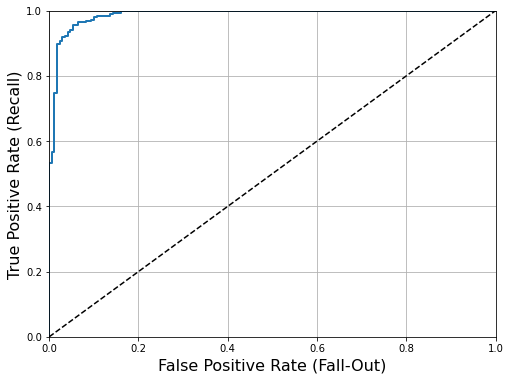

In [177]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                        
plot_roc_curve(fpr, tpr)        
plt.show()

The higher the recall (TPR), the more false positives (FPR) the classifier produces.  The dotted line represents the ROC curve of a purely random classifier, a good classfier stays as far away from the line as possible.

**Quesiton 10**

Compute the area under the curve (AUC) using `auc_score()`

In [178]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9878139611867423

**Question 11**

We are finally done with our binary classification...Wait a minute! Did we just computed all the evaluation metrics on ***training set*** ??!!  Isn't it bad practice to do so.. Don't we need to use ***test set*** to evaluate how good is our model?

Why?



# Multiclass classification

We will now look at multi-class classification. The dataset we are going to use is the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where each class refers to a digit. Each digit is a 8x8 image.  

In [182]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


**Question 12**

Now create the X (the features) and y (the label) from the digits dataset.  X is a np.array of 64 pixel values, while y is the label e.g. 0, 1, 2, 3, .. 9. 

In [183]:
X = digits['data']
y = digits['target']

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


Let's plot the image of a particular digit to visualize it.  Before plotting, we need to reshape the 64 numbers into 8 x 8 image arrays so that it can be plotted.

digit is 4


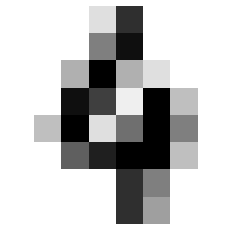

In [184]:
# let's choose any one of the row and plot it
some_digit = X[100]

# print out the corresponding label
print('digit is {}'.format(y[100]))

# reshape it to 8 x 8 image
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

**Question 13**

Split the data into train and test set, and randomly shuffle the data.

In [187]:
## enter your code here

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

Multiclass classifiers distinguish between more than two classess.  Scikit-learn detects when you try to use a binary classification alogorithm for a multiple class classification task and it automatically runs one-versus-all (OvA)

**Question 14**

Use Logistic Regression to train using the training set, and make a prediction of the chosen digit (some_digit). Is the prediction correct?

In [188]:
# Complete the code 

lr_clf = LogisticRegression(solver='lbfgs', max_iter=2000, multi_class='ovr')
lr_clf.fit(X_train, y_train)

lr_clf.predict([some_digit])

array([4])

Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image and selected the class with the highest score.  

**Question 15**

Compute the scores using the `decision_function()` method to return 10 scores, one per class.

In [189]:
# complete the code 
some_digit = X[100]
some_digit_scores = lr_clf.decision_function([some_digit])
print(some_digit_scores)

[[-16.5764407   -7.86909069 -38.04495963 -26.0075216    9.30098301
  -24.81509943 -10.49942863 -16.12681253 -16.9376822  -49.3079538 ]]


The highest score is the one corresponding to the correct class.

In [190]:
index = np.argmax(some_digit_scores)
print(index)

4


In [191]:
lr_clf.classes_[index]

4

**Question 16**

Use `cross_val_score()` to evaluate the classifier

In [192]:
val_score = cross_val_score(lr_clf, X_train, y_train, cv=3)
print(val_score)

[0.94989562 0.95407098 0.96450939]


**Question 17**

Compute the confusion matrix of the classifier.

In [193]:
y_train_preds = cross_val_predict(lr_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_preds)

array([[146,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 133,   0,   1,   0,   0,   1,   0,   5,   2],
       [  0,   0, 147,   2,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 141,   0,   4,   0,   1,   3,   1],
       [  0,   1,   0,   0, 146,   0,   0,   0,   0,   1],
       [  1,   2,   1,   0,   0, 132,   0,   1,   1,   3],
       [  0,   2,   0,   0,   0,   1, 137,   0,   1,   0],
       [  0,   1,   0,   0,   0,   0,   0, 135,   1,   1],
       [  0,   6,   0,   0,   1,   2,   1,   1, 127,   2],
       [  0,   1,   1,   2,   1,   1,   0,   1,   2, 130]])

**Question 13**

Print out the classification_report.  

In [194]:
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       147
           1       0.91      0.94      0.92       142
           2       0.98      0.98      0.98       150
           3       0.97      0.93      0.95       151
           4       0.98      0.99      0.98       148
           5       0.94      0.94      0.94       141
           6       0.99      0.97      0.98       141
           7       0.97      0.98      0.97       138
           8       0.90      0.91      0.90       140
           9       0.93      0.94      0.93       139

    accuracy                           0.96      1437
   macro avg       0.96      0.96      0.96      1437
weighted avg       0.96      0.96      0.96      1437

